# Advanced Techniques

Attempt to increase the model efficiency using a combination of a random forest classifier, extra trees classifier and gradient boosting classifier. 

Feature engineering is creating new variables from existing variables to gain further insight and analysis into the dataset. Adding new predictive variables to the algorithm may increase accuracy.

## Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import scipy.stats as ss
import math

train = pd.read_csv("https://www.dropbox.com/s/1xyc3klpx2mtrqf/train.csv?dl=1")
test = pd.read_csv("https://www.dropbox.com/s/7n7k0f676i6nbng/test.csv?dl=1")

In [2]:
# fill missing values
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
train['Embarked'] = train['Embarked'].fillna('S')

## Creating Features

In [3]:
# review of variables before encoding
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# add FamilySize
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1

In [5]:
# add isAlone
train['isAlone'] = train['FamilySize'].map(lambda x: 1 if x == 1 else 0)
test['isAlone'] = test['FamilySize'].map(lambda x: 1 if x == 1 else 0)

In [6]:
# add hasCabin
train['hasCabin'] = train['Cabin'].notnull().astype(int)
test['hasCabin'] = test['Cabin'].notnull().astype(int)

In [7]:
# add Ticket_Len
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))
test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))

In [8]:
# add Title
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [9]:
# add Name_Len
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
test['Name_Len'] = test['Name'].apply(lambda x: len(x))

In [10]:
# drop less useful variables
train.drop(labels=(['Cabin','Name', 'Parch', 'SibSp', 'Ticket']), axis=1, inplace=True)
test.drop(labels=(['Cabin','Name', 'Parch', 'SibSp', 'Ticket']), axis=1, inplace=True)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,hasCabin,Ticket_Len,Title,Name_Len
0,1,0,3,male,22.0,7.2500,S,2,0,0,9,Mr.,23
1,2,1,1,female,38.0,71.2833,C,2,0,1,8,Mrs.,51
2,3,1,3,female,26.0,7.9250,S,1,1,0,16,Miss.,22
3,4,1,1,female,35.0,53.1000,S,2,0,1,6,Mrs.,44
4,5,0,3,male,35.0,8.0500,S,1,1,0,6,Mr.,24


## Encode Categorical Features

Encode the categorical features by either One Hot Encoding or Get Dummies for nominal categoricals, or In Place / Label Encoder for ordinal categoricals.

In [12]:
# encode variables
dummies = pd.get_dummies(train[['Sex']])
train = train.drop(columns = ['Sex'])
train = pd.concat([train, dummies], axis='columns')

dummies = pd.get_dummies(test[['Sex']])
test = test.drop(columns = ['Sex'])
test = pd.concat([test, dummies], axis='columns')

In [13]:
train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2
test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2

In [14]:
train.loc[train['Title'] == 'Mr.', 'Title'] = 0
train.loc[train['Title'] == 'Mrs.', 'Title'] = 1
train.loc[train['Title'] == 'Master.', 'Title'] = 2
train.loc[train['Title'] == 'Dr.', 'Title'] = 3
train.loc[train['Title'] == 'Rev.', 'Title'] = 4
train.loc[train['Title'] == 'Mlle.', 'Title'] = 5
train.loc[train['Title'] == 'Col.', 'Title'] = 6
train.loc[train['Title'] == 'Major.', 'Title'] = 7
train.loc[train['Title'] == 'the', 'Title'] = 8
train.loc[train['Title'] == 'Don.', 'Title'] = 9
train.loc[train['Title'] == 'Capt.', 'Title'] = 10
train.loc[train['Title'] == 'Mme.', 'Title'] = 11
train.loc[train['Title'] == 'Lady.', 'Title'] = 12
train.loc[train['Title'] == 'Jonkheer.', 'Title'] = 13
train.loc[train['Title'] == 'Sir.', 'Title'] = 14
train.loc[train['Title'] == 'Ms.', 'Title'] = 15

In [15]:
train.loc[train['Title'] == 'Miss.', 'Title'] = 16

In [16]:
test.loc[test['Title'] == 'Mr.', 'Title'] = 0
test.loc[test['Title'] == 'Mrs.', 'Title'] = 1
test.loc[test['Title'] == 'Master.', 'Title'] = 2
test.loc[test['Title'] == 'Dr.', 'Title'] = 3
test.loc[test['Title'] == 'Rev.', 'Title'] = 4
test.loc[test['Title'] == 'Mlle.', 'Title'] = 5
test.loc[test['Title'] == 'Col.', 'Title'] = 6
test.loc[test['Title'] == 'Major.', 'Title'] = 7
test.loc[test['Title'] == 'the', 'Title'] = 8
test.loc[test['Title'] == 'Don.', 'Title'] = 9
test.loc[test['Title'] == 'Capt.', 'Title'] = 10
test.loc[test['Title'] == 'Mme.', 'Title'] = 11
test.loc[test['Title'] == 'Lady.', 'Title'] = 12
test.loc[test['Title'] == 'Jonkheer.', 'Title'] = 13
test.loc[test['Title'] == 'Sir.', 'Title'] = 14
test.loc[test['Title'] == 'Ms.', 'Title'] = 15
test.loc[test['Title'] == 'Miss.', 'Title'] = 16

In [17]:
test.loc[test['Title'] == 'Dona.', 'Title'] = 17

In [18]:
train.head(2)

,PassengerId,Survived,Pclass,Age,Fare,Embarked,FamilySize,isAlone,hasCabin,Ticket_Len,Title,Name_Len,Sex_female,Sex_male
0,1,0,3,22.0,7.2500,0,2,0,0,9,0,23,0,1
1,2,1,1,38.0,71.2833,1,2,0,1,8,1,51,1,0


In [19]:
test.head(2)

,PassengerId,Pclass,Age,Fare,Embarked,FamilySize,isAlone,hasCabin,Ticket_Len,Title,Name_Len,Sex_female,Sex_male
0,892,3,34.5,7.8292,2,1,1,0,6,0,16,0,1
1,893,3,47.0,7.0000,0,2,0,0,6,1,32,1,0


## Train / Test Split

In [20]:
from sklearn.model_selection import train_test_split

# target
y = train.pop('Survived')

# features
X = (train.values)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [22]:
X_train.shape, X_test.shape

((623, 13), (268, 13))

## Modelling

In [23]:
import sklearn.metrics as sklm
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# build and fit the random_forest classifer using the training set
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rfc = rfc.fit(X_train, y_train)

# print the score for the training set
print(rfc.score(X_train, y_train))

1.0


In [25]:
# apply the model to the test set and output score - held back data
rfc.score(X_test, y_test)

0.8022388059701493

In [26]:
# cross-validation
rfc_cv =cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',rfc_cv.mean())

The cross validated score for Random Forest Classifier is: 0.8395213369651572


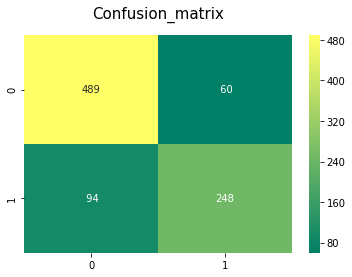

In [27]:
# cross-validated predictions of full train data in confusion matrix
y_pred = cross_val_predict(rfc, X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15);

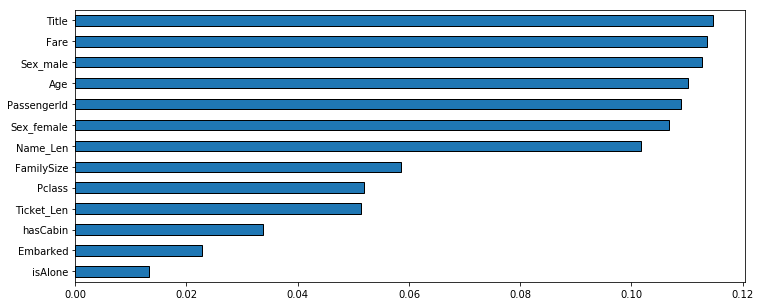

In [28]:
feature_importances = pd.Series(rfc.feature_importances_, index=train.columns)
feature_importances.sort_values(ascending=True).plot(kind="barh", edgecolor="black", color="#1F77B4", figsize=(12,5));

### Gradient Boosting Classifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# build and fit the random_forest classifer using the training set
gbc = GradientBoostingClassifier()

gbc = gbc.fit(X_train, y_train)

# print the score for the training set
print(gbc.score(X_train, y_train))

0.9341894060995185


In [30]:
# apply the model to the test set and output score - held back data
gbc.score(X_test, y_test)

0.7985074626865671

In [31]:
# cross-validation
gbc_cv =cross_val_score(gbc, X, y, cv=10, scoring='accuracy')
print('The cross validated score for GBC Classifier is:',gbc_cv.mean())

The cross validated score for GBC Classifier is: 0.8138040517534899


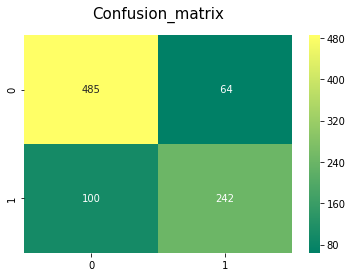

In [32]:
# cross-validated predictions of full train data in confusion matrix
y_pred = cross_val_predict(gbc, X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15);

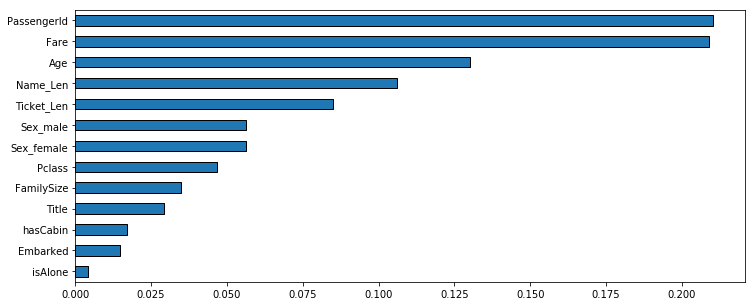

In [33]:
feature_importances = pd.Series(gbc.feature_importances_, index=train.columns)
feature_importances.sort_values(ascending=True).plot(kind="barh", edgecolor="black", color="#1F77B4", figsize=(12,5));

### Extra Trees Classifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

# build and fit the Extra Trees classifer using the training set
etc = ExtraTreesClassifier()

etc = etc.fit(X_train, y_train)

# print the score for the training set
print(etc.score(X_train, y_train))

1.0


In [35]:
# apply the model to the test set and output score - held back data
etc.score(X_test, y_test)

0.7723880597014925

In [36]:
# cross-validation
etc_cv =cross_val_score(etc, X, y, cv=10, scoring='accuracy')
print('The cross validated score for ETC Classifier is:',etc_cv.mean())

The cross validated score for ETC Classifier is: 0.8136911247304506


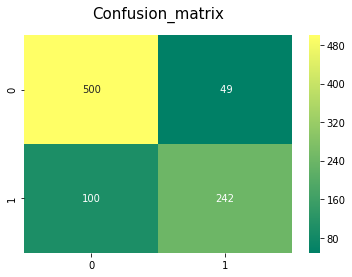

In [37]:
# cross-validated predictions of full train data in confusion matrix
y_pred = cross_val_predict(etc, X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15);

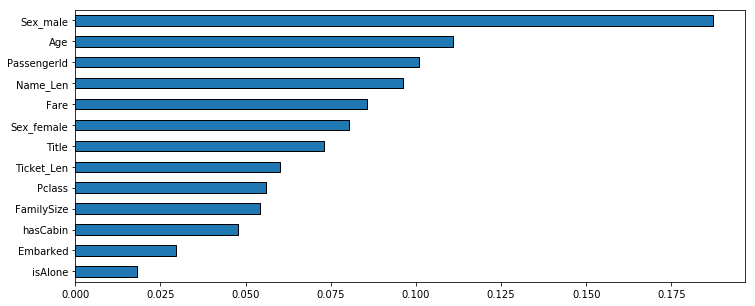

In [38]:
feature_importances = pd.Series(etc.feature_importances_, index=train.columns)
feature_importances.sort_values(ascending=True).plot(kind="barh", edgecolor="black", color="#1F77B4", figsize=(12,5));

## Ensemble Model

Assessing an ensemble model - the predictions correlate however are slightly different.

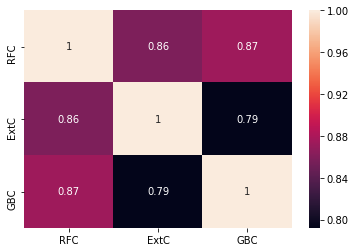

In [39]:
test_Survived_RFC = pd.Series(rfc.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(etc.predict(test), name="ExtC")
test_Survived_GBC = pd.Series(gbc.predict(test), name="GBC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_GBC],axis=1)

g= sns.heatmap(ensemble_results.corr(), annot=True)

## Deployment

In [40]:
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('rfc', rfc), ('extc', etc), ('gbc', gbc)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [44]:
# making the prediction - first extract test features
final_test = test.values

# make prediction using the test dataset
prediction = votingC.predict(final_test)

C:\Users\L.Spencer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [51]:
# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
output = pd.DataFrame()

PassengerId = np.array(test["PassengerId"]).astype(int)

output['PassengerId'] = PassengerId
output['Survived'] = prediction

output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [52]:
output.to_csv("submission.csv", index=False)

## Result

By using feature engineering and ensemble methods to create new variables and blend models, upon re-submission to the Kaggle competition the result had improved from 77% to 79% accuracy which is within the top 21% of leaderboard submissions.

<img src="https://github.com/LRS4/Python-Projects/blob/master/Titanic%20Prediction%20Project/KaggleResult.PNG?raw=true">